<a href="https://colab.research.google.com/github/LucilleKaleha/Customer-Behaviour/blob/master/W13_IP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
install.packages("pacman")
# List of packages
package_list = c("data.table","tidyverse", "ggplot2", "dplyr", "readr", "lubridate", "readxl", "tidyr", "Hmisc", "skimr",
                  "ggcorrplot","caret", "caretEnsemble", "PerformanceAnalytics", "kableExtra", "kernlab", "DataExplorer")

# Load/Install packages
suppressMessages(pacman::p_load(package_list, character.only = TRUE))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


In [2]:
library("data.table")
df = fread("http://bit.ly/EcommerceCustomersDataset")
head(df)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<int>,<int>,<int>,<int>,<chr>,<lgl>,<lgl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0,0,Feb,1,1,1,1,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,64.000000,0.00000000,0.1000000,0,0,Feb,2,2,1,2,Returning_Visitor,FALSE,FALSE
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0,0,Feb,4,1,9,3,Returning_Visitor,FALSE,FALSE
0,0,0,0,2,2.666667,0.05000000,0.1400000,0,0,Feb,3,2,2,4,Returning_Visitor,FALSE,FALSE
0,0,0,0,10,627.500000,0.02000000,0.0500000,0,0,Feb,3,3,1,4,Returning_Visitor,TRUE,FALSE
0,0,0,0,19,154.216667,0.01578947,0.0245614,0,0,Feb,2,2,1,3,Returning_Visitor,FALSE,FALSE


## Exploratory Data Analysis


In [3]:
# Checking the data types and variable names
str(df)

Classes ‘data.table’ and 'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : num  0 0 0 0 0 0 0.4 0 0.8 0.4 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : int  1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : int  1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : int  1 1 9 2 1 1 3 1 2 1 ...
 $ TrafficType            : int  1 2 3 4 4 3 3 5 3 2 ...
 $ VisitorType            : chr  "Returning_Visitor" "Retu

In [4]:
# Changing factor variables to their appropriate data type

df$OperatingSystems=as.factor(df$OperatingSystems)
df$Browser=as.factor(df$Browser)
df$Region=as.factor(df$Region)
df$Weekend=as.factor(df$Weekend)
df$Revenue=as.factor(df$Revenue)
df$SpecialDay=as.factor(df$SpecialDay)
df$TrafficType=as.factor(df$SpecialDay)

str(df)

Classes ‘data.table’ and 'data.frame':	12330 obs. of  18 variables:
 $ Administrative         : int  0 0 0 0 0 0 0 1 0 0 ...
 $ Administrative_Duration: num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ Informational          : int  0 0 0 0 0 0 0 0 0 0 ...
 $ Informational_Duration : num  0 0 -1 0 0 0 -1 -1 0 0 ...
 $ ProductRelated         : int  1 2 1 2 10 19 1 1 2 3 ...
 $ ProductRelated_Duration: num  0 64 -1 2.67 627.5 ...
 $ BounceRates            : num  0.2 0 0.2 0.05 0.02 ...
 $ ExitRates              : num  0.2 0.1 0.2 0.14 0.05 ...
 $ PageValues             : num  0 0 0 0 0 0 0 0 0 0 ...
 $ SpecialDay             : Factor w/ 6 levels "0","0.2","0.4",..: 1 1 1 1 1 1 3 1 5 3 ...
 $ Month                  : chr  "Feb" "Feb" "Feb" "Feb" ...
 $ OperatingSystems       : Factor w/ 8 levels "1","2","3","4",..: 1 2 4 3 3 2 2 1 2 2 ...
 $ Browser                : Factor w/ 13 levels "1","2","3","4",..: 1 2 1 2 3 2 4 2 2 4 ...
 $ Region                 : Factor w/ 9 levels "1","2","3","4",..: 1 1 9 2 

In [5]:
# Checking for null values in the dataframe
colSums(is.na(df))

Administrative Administrative_Duration           Informational 
                     14                      14                      14 
 Informational_Duration          ProductRelated ProductRelated_Duration 
                     14                      14                      14 
            BounceRates               ExitRates              PageValues 
                     14                      14                       0 
             SpecialDay                   Month        OperatingSystems 
                      0                       0                       0 
                Browser                  Region             TrafficType 
                      0                       0                       0 
            VisitorType                 Weekend                 Revenue 
                      0                       0                       0

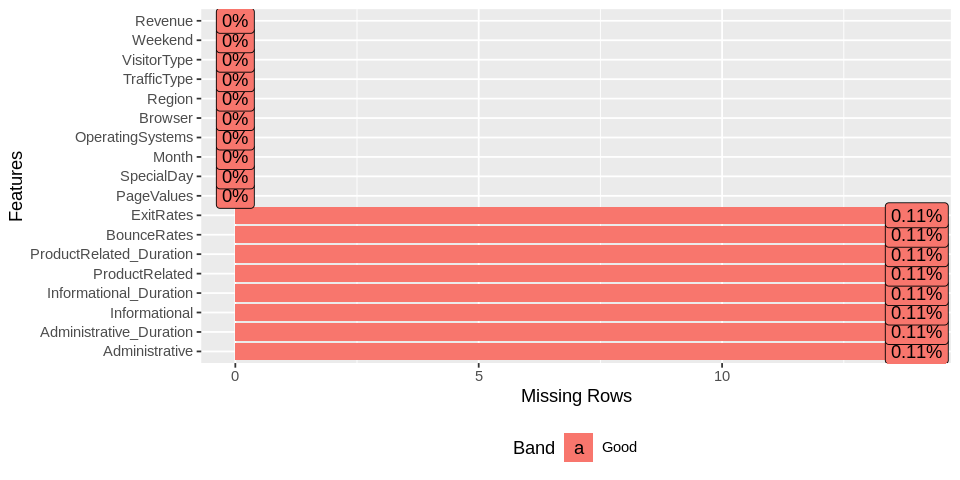

In [6]:
# making a plot/visualization o the missing values

library(DataExplorer)
options(repr.plot.width=8, repr.plot.height= 4)
plot_missing(df)

In [0]:
# Getting some descriptive statistics on the dataframe
describe(df)

df 

 18  Variables      12330  Observations
--------------------------------------------------------------------------------
Administrative 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316       14       27    0.895    2.318    3.177        0        0 
     .25      .50      .75      .90      .95 
       0        1        4        7        9 

lowest :  0  1  2  3  4, highest: 22 23 24 26 27
--------------------------------------------------------------------------------
Administrative_Duration 
       n  missing distinct     Info     Mean      Gmd      .05      .10 
   12316       14     3336    0.892    80.91    124.9      0.0      0.0 
     .25      .50      .75      .90      .95 
     0.0      8.0     93.5    225.1    348.9 

lowest :   -1.000000    0.000000    1.333333    2.000000    3.000000
highest: 2407.423810 2629.253968 2657.318056 2720.500000 3398.750000
--------------------------------------------------------------------------------
Inform

In [0]:
# Getting some summary statistics on the numerical variables

df %>% select_if(is.numeric) %>% map(~summary(.))

$Administrative
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   1.000   2.318   4.000  27.000      14 

$Administrative_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -1.00    0.00    8.00   80.91   93.50 3398.75      14 

$Informational
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  0.000   0.000   0.000   0.504   0.000  24.000      14 

$Informational_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
  -1.00    0.00    0.00   34.51    0.00 2549.38      14 

$ProductRelated
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   0.00    7.00   18.00   31.76   38.00  705.00      14 

$ProductRelated_Duration
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max.    NA's 
   -1.0   185.0   599.8  1196.0  1466.5 63973.5      14 

$BounceRates
    Min.  1st Qu.   Median     Mean  3rd Qu.     Max.     NA's 
0.000000 0.000000 0.003119 0.022152 0.016684 0.200000       14 

$ExitRates
   Min. 1st Qu.  Median    Mean 3rd 

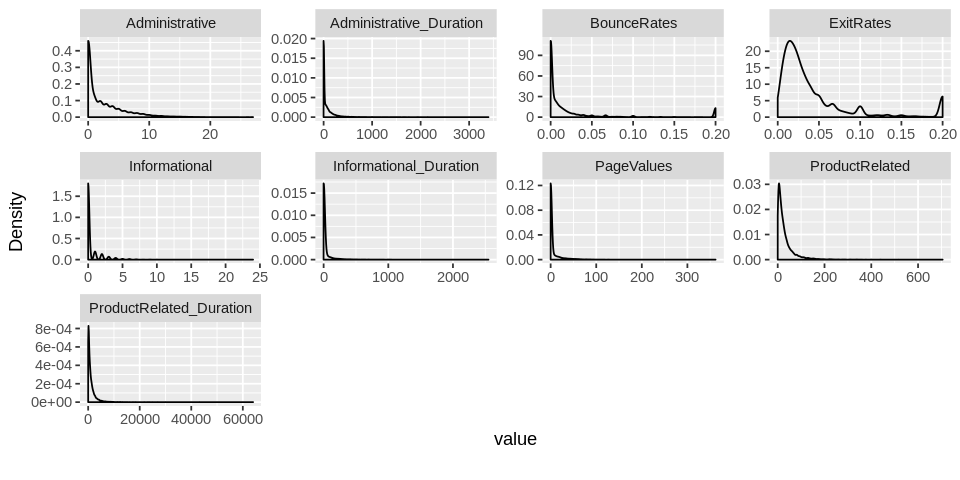

In [7]:
# Checking the disreibution of the variables in our dataset

plot_density(df)

In [11]:
#  Number the null values

length(which(is.na(df)))
sum((complete.cases(df)==T))

[1] 112

[1] 12316

In [0]:
# Dropping the null values
df = na.omit(df)

In [20]:
data = df[, 1:9]
head(data)

Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues
<int>,<dbl>,<int>,<dbl>,<int>,<dbl>,<dbl>,<dbl>,<dbl>
0,0,0,0,1,0.000000,0.20000000,0.2000000,0
0,0,0,0,2,64.000000,0.00000000,0.1000000,0
0,-1,0,-1,1,-1.000000,0.20000000,0.2000000,0
0,0,0,0,2,2.666667,0.05000000,0.1400000,0
0,0,0,0,10,627.500000,0.02000000,0.0500000,0
0,0,0,0,19,154.216667,0.01578947,0.0245614,0


In [21]:
shop.pca = prcomp(data, center = TRUE, scale. = TRUE)
summary(shop.pca)

Importance of components:
                          PC1    PC2    PC3    PC4    PC5     PC6     PC7
Standard deviation     1.8405 1.2917 1.0131 1.0017 0.9695 0.64983 0.59304
Proportion of Variance 0.3764 0.1854 0.1140 0.1115 0.1044 0.04692 0.03908
Cumulative Proportion  0.3764 0.5617 0.6758 0.7873 0.8917 0.93864 0.97772
                           PC8     PC9
Standard deviation     0.35076 0.27842
Proportion of Variance 0.01367 0.00861
Cumulative Proportion  0.99139 1.00000

In [22]:
library(devtools)
install_github("vqv/ggbiplot")

Loading required package: usethis


digest (0.6.21 -> 0.6.22) [CRAN]
rlang  (0.4.0  -> 0.4.1 ) [CRAN]


Installing 2 packages: digest, rlang
Installing packages into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


✔  checking for file ‘/tmp/RtmpO7jQaO/remotes7819aa38da/vqv-ggbiplot-7325e88/DESCRIPTION’
─  preparing ‘ggbiplot’:
✔  checking DESCRIPTION meta-information
─  checking for LF line-endings in source and make files and shell scripts
─  checking for empty or unneeded directories
─  looking to see if a ‘data/datalist’ file should be added
─  building ‘ggbiplot_0.55.tar.gz’
   


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)


Loading required package: plyr
------------------------------------------------------------------------------
You have loaded plyr after dplyr - this is likely to cause problems.
If you need functions from both plyr and dplyr, please load plyr first, then dplyr:
library(plyr); library(dplyr)
------------------------------------------------------------------------------

Attaching package: ‘plyr’

The following objects are masked from ‘package:Hmisc’:

    is.discrete, summarize

The following object is masked from ‘package:lubridate’:

    here

The following objects are masked from ‘package:dplyr’:

    arrange, count, desc, failwith, id, mutate, rename, summarise,
    summarize

The following object is masked from ‘package:purrr’:

    compact

Loading required package: scales

Attaching package: ‘scales’

The following object is masked from ‘package:kernlab’:

    alpha

The following object is masked from ‘package:purrr’:

    discard

The following object is masked from ‘package:r

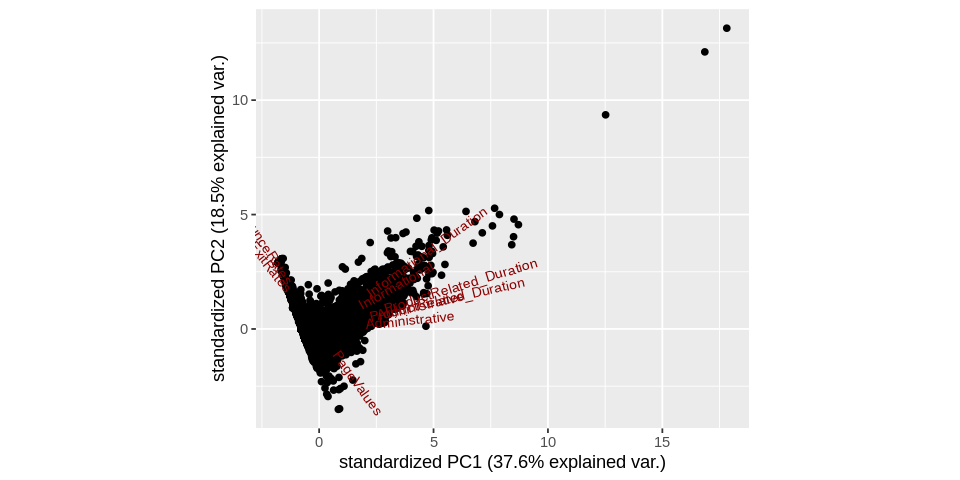

In [23]:
library(ggbiplot)
ggbiplot(shop.pca)

In [0]:
# Normalizing the numerical variables in the data
df_norm <- as.data.frame(apply(df[, 1:9], 2, function(x) (x - min(x))/(max(x)-min(x))))

In [0]:
# Selecting the features
df1 = df[,1:17]
# Getting dummies
dumm = dummyVars("~ .", data = df1)
shop_df = data.frame(predict(dumm, newdata = df1))

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)
also installing the dependencies ‘zip’, ‘SparseM’, ‘MatrixModels’, ‘sp’, ‘openxlsx’, ‘minqa’, ‘nloptr’, ‘RcppEigen’, ‘carData’, ‘pbkrtest’, ‘quantreg’, ‘maptools’, ‘rio’, ‘lme4’, ‘car’, ‘ellipse’, ‘flashClust’, ‘leaps’, ‘scatterplot3d’, ‘ggsci’, ‘cowplot’, ‘ggsignif’, ‘polynom’, ‘abind’, ‘dendextend’, ‘FactoMineR’, ‘ggpubr’, ‘ggrepel’

Welcome! Related Books: `Practical Guide To Cluster Analysis in R` at https://goo.gl/13EFCZ


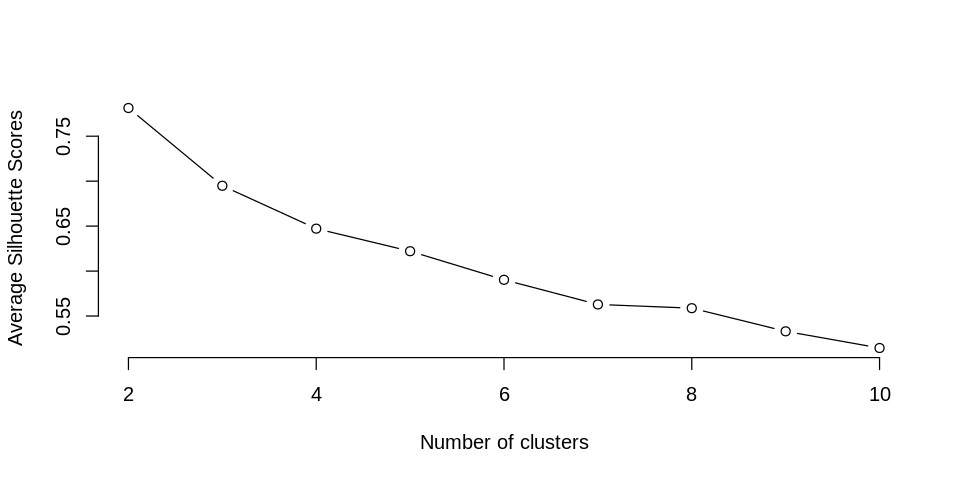

In [29]:
# Finding the optimum number of clusters in the data. The Silhouette method is used
# Clustering
library(cluster)
install.packages('factoextra')
library(factoextra)
silhouette_score <- function(k){
  km <- kmeans(shop_df, centers = k, nstart=25)
  ss <- silhouette(km$cluster, dist(shop_df))
  mean(ss[, 3])
}
k <- 2:10
avg_sil <- sapply(k, silhouette_score)
plot(k, type='b', avg_sil, xlab='Number of clusters', ylab='Average Silhouette Scores', frame=FALSE)

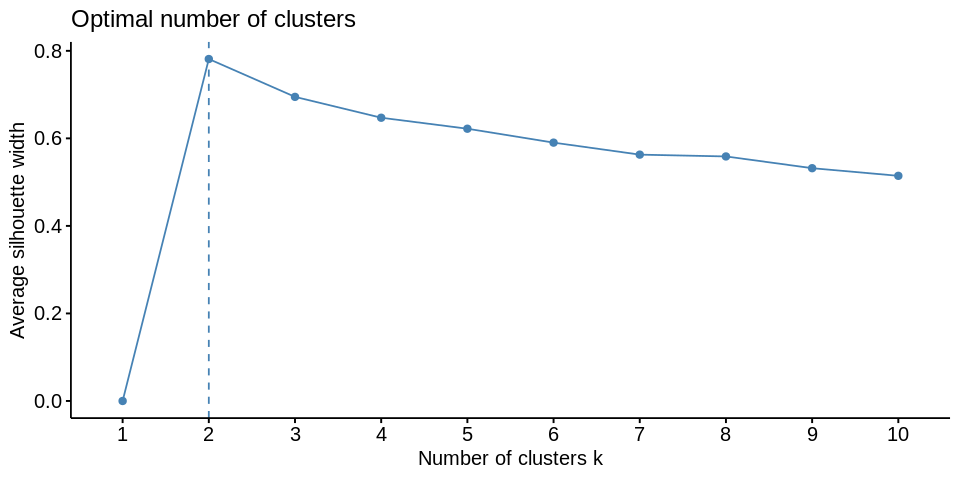

In [31]:
# getting the optimum number of clusters to use
fviz_nbclust(shop_df, kmeans, method='silhouette')

In [0]:
# Applying kmeans clustering to the dataframe
set.seed(222)
means = kmeans(shop_df, 2, iter.max = 400, nstart = 5)
